In [27]:
import re
import matplotlib.pyplot as plt
FILENAME = 'Apache_2k.log'

In [23]:
def read_logs():
    with open(FILENAME, 'r') as f:
        log_lines = f.readlines()

    return log_lines

def parse_error(line):
    if line.lower().find('error') > 0:
        return True
    return False


def parse_notices(line):
    if (line.lower().find('notice') > 0):
        return True
    return False

def parse_forbidden_access(line):
    if(line.lower().find('forbidden')>0):
        return True
    return False

def parse_functions(line):
    pattern = '\s+\w+\s*\((?:\s*\w+\s*,\s*\w*\s*){2,2}\w+\s*\)'
    if(line.lower().find(pattern) > 0):
        return True
    return False
                                                                                           

In [24]:
def main():
    log_lines = read_logs()
    error_count =0
    notice_count=0
    forbidden_access_count=0
    functions = []
    for lines in log_lines:
        if parse_error(lines) == True:
            error_count+=1
        elif parse_notices(lines) == True:
            notice_count +=1
    for lines in log_lines:
        if parse_forbidden_access(lines) == True:
            forbidden_access_count += 1
    for lines in log_lines:
        if parse_functions(lines) == True:
            functions.append(lines)
    display(functions)
    return [error_count,notice_count,forbidden_access_count]

[]

<BarContainer object of 3 artists>

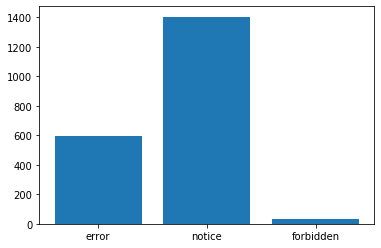

In [29]:
values = main()
plt.bar(['error','notice','forbidden'],values)

In [ ]:
line = '[Sun Dec 04 04:47:44 2005] [notice] workerEnv.init() ok /etc/httpd/conf/workers2.properties'
regex = '\[(.*?)\] \[(.*?)\] (.*?) (.*?) (\/[a-zA-Z0-9#]+\/?)*'